In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
inspector = inspect(engine)
inspector.get_columns('measurement')
# inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=1) - dt.timedelta(weeks=52)
query_date 
# --- (datetime.date(2016, 9, 21))

prcp_12_months = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date>=query_date).\
                        order_by(Measurement.date).all()
prcp_12_months

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [76]:
# Load the results into a pandas dataframe. Set the index to the `Date`
prcp_df = pd.DataFrame(prcp_12_months, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True, )
prcp_df.head(20)
# prcp_df.dtypes

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [ ]:
# prcp_df.to_datetime(df)

In [77]:
prcp_df["Precipitation"].isnull().sum()
len(prcp_df)

2230

In [78]:
# Clean DataFrame
# Check if DF has null values
if prcp_df["Precipitation"].isnull().sum()>0:
    prcp_df.dropna(inplace=True)
print(len(prcp_df))
prcp_df.head(20)

2021


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [79]:
# Check max prcp value
prcp_df["Precipitation"].max()

6.7

In [80]:
prcp_df.index.values

array(['2016-08-23', '2016-08-23', '2016-08-23', ..., '2017-08-23',
       '2017-08-23', '2017-08-23'], dtype=object)

In [81]:
# set x axis and tick locations
# x_axis = np.arange(len(mice_regimen))
# tick_locations = [x for x in x_axis]

x_axis = np.arange(0, len(prcp_df.index.values),200) 
tick_locations = [x for x in x_axis]
print(tick_locations)

months = [prcp_df.index.values[i] for i in tick_locations]
months

for i in tick_locations:
    print(f"i: {i} value: {prcp_df.index.values[i]}")

[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
i: 0 value: 2016-08-23
i: 200 value: 2016-09-27
i: 400 value: 2016-10-31
i: 600 value: 2016-12-05
i: 800 value: 2017-01-09
i: 1000 value: 2017-02-13
i: 1200 value: 2017-03-22
i: 1400 value: 2017-04-26
i: 1600 value: 2017-06-02
i: 1800 value: 2017-07-08
i: 2000 value: 2017-08-17


Text(0, 0.5, 'Precipitation (Inches)')

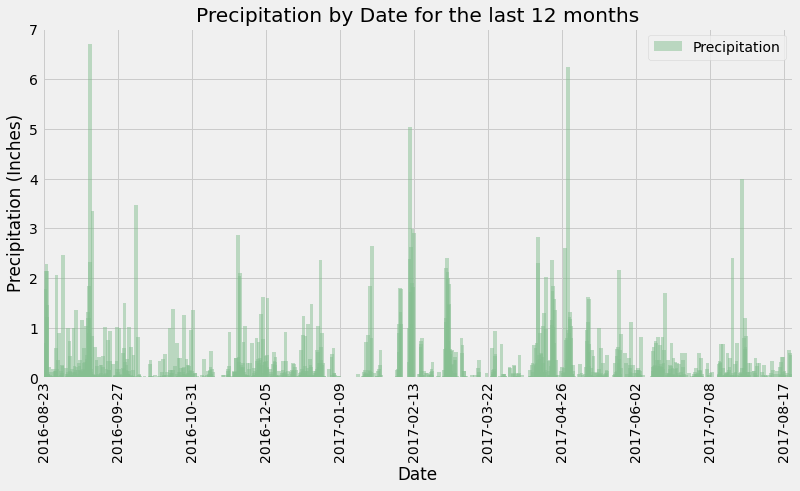

In [82]:
# Plot Bar chart for Precipitation by Date for the last 12 months
prcp_chart = prcp_df.plot.bar(title = 'Precipitation by Date for the last 12 months',
                              facecolor='#86bf91', alpha=0.5,
                              width = 10, figsize=(12,6))
# prcp_chart.set_xticks(tick_locations, months)
plt.xticks(tick_locations, months, rotation=90)

prcp_chart.set_ylabel("Precipitation (Inches)")

In [ ]:
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()